<a href="https://colab.research.google.com/github/florcisco/Online-Retail-Analysis/blob/main/Online_Retail_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto: Online Retail Analysis
Autor: Francisco Lombroni

En este proyecto, analizaremos un dataset público sobre ventas en linea de una tienda ubicada en el Reino Unido entre 2010 y 2011. Para eso, importamos las librerias necesarias y cargamos el dataset.

## Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


## Carga del dataset

In [ ]:
from google.colab import files
import os

# Create the data directory if it doesn't exist
if not os.path.exists('data'):
    os.makedirs('data')

# Upload the file
uploaded = files.upload()

for filename in uploaded.keys():
    # Move the uploaded file to the 'data/' directory
    os.rename(filename, f'data/{filename}')
    print(f'Moved {filename} to data/{filename}')

print("File upload and move complete. Please ensure 'Online Retail.xlsx' was among the uploaded files.")

Saving OnlineRetail.csv to OnlineRetail.csv
Moved OnlineRetail.csv to data/OnlineRetail.csv
File upload and move complete. Please ensure 'Online Retail.xlsx' was among the uploaded files.


In [ ]:
df = pd.read_csv("data/OnlineRetail.csv", encoding='latin-1')
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
df.head()

Filas: 541909, Columnas: 8


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Limpieza de datos

Una vez cargado, haremos una limpieza y organización de los datos. En primer lugar, eliminamos las compras que consideramos irrelevantes para nuestro analisis: las que no tengan clientes asociados, las compras canceladas, y en las que haya alguna cantidad negativa, por algún motivo. De esta manera, quedan 397 mil registros de 541 mil originales.

Ademas, crearemos algunas columnas nuevas:

* TotalPrice: que resulta de multiplicar la cantidad por el precio por unidad

* Usando la columna InvoiceDate, que hace referencia a la fecha de la compra, la transformaremos en información tipo fecha, y la almacenaremos en tres columnas diferentes, una para el mes, una para el día, y otra para la hora.

Finalmente, eliminaremos la columna codigo de stock. En principio, podríamos eliminar InvoiceDate, pero la conservaremos para un analisis especifico más adelante.

In [ ]:
# Limpieza de datos
df = df.dropna(subset=['CustomerID'])  # quitar filas sin cliente
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]  # quitar cancelaciones
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]  # quitar negativos

# Columnas nuevas
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.hour

# Eliminamos las Columnas
df = df.drop(columns=['StockCode'], axis=1)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   Description  397884 non-null  object        
 2   Quantity     397884 non-null  int64         
 3   InvoiceDate  397884 non-null  datetime64[ns]
 4   UnitPrice    397884 non-null  float64       
 5   CustomerID   397884 non-null  float64       
 6   Country      397884 non-null  object        
 7   TotalPrice   397884 non-null  float64       
 8   Year         397884 non-null  int32         
 9   Month        397884 non-null  int32         
 10  DayOfWeek    397884 non-null  object        
 11  Hour         397884 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(3), int64(1), object(4)
memory usage: 34.9+ MB


## Análisis Exploratorio de Datos (EDA)

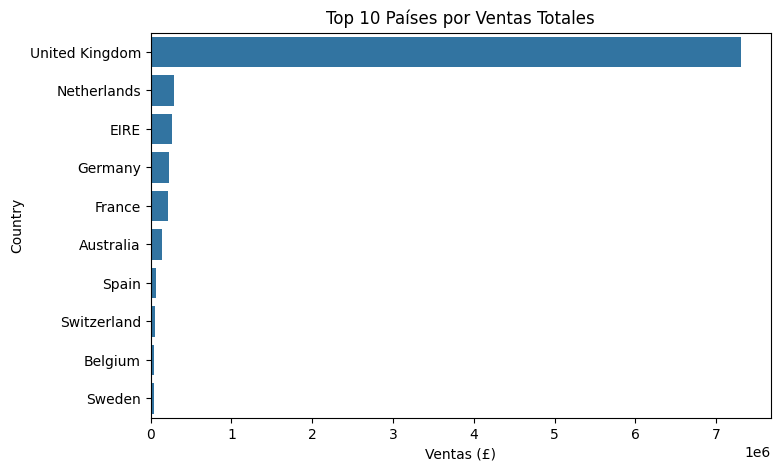

In [ ]:
# Ventas totales por país
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=country_sales.values, y=country_sales.index)
plt.title("Top 10 Países por Ventas Totales")
plt.xlabel("Ventas (£)")
plt.show()


Observando ahora el gráfico de ventas por paises, notamos que la mayoría de las ventas son realizadas en el Reino Unido. Separaremos las ventas y veremos cuan grande es esta diferencia.

In [ ]:
# Ventas totales por país
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

# Agrupar Reino Unido vs resto
uk_sales = country_sales.loc['United Kingdom']
other_sales = country_sales.sum() - uk_sales

sales_split = pd.Series({
    'United Kingdom': uk_sales,
    'Otros países': other_sales
})


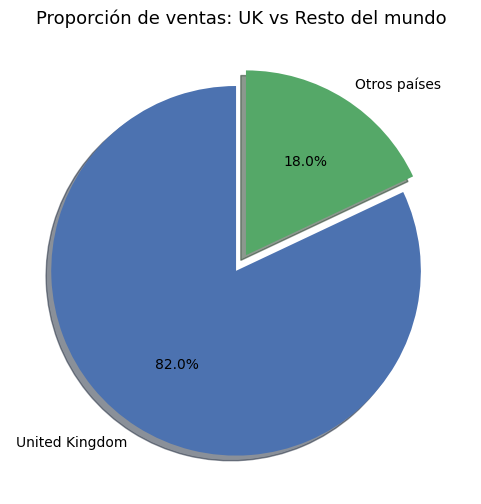

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(
    sales_split.values,
    labels=sales_split.index,
    autopct='%1.1f%%',      # porcentaje con un decimal
    startangle=90,          # rotación inicial
    colors=['#4c72b0', '#55a868'],  # paleta suave
    explode=(0.05, 0.05),   # separa levemente ambas porciones
    shadow=True
)

plt.title("Proporción de ventas: UK vs Resto del mundo", fontsize=13)
plt.show()


Con el gráfico anterior, queda en evidencia que el peso de las compras en el Reino Unido es mucho mayor que de los demás paises, por lo que considero necesario separar el dataset en dos grupos, ya que las tendencias observadas pueden ser diferentes, y serían tomadas como verdaderas o comprobadas las aplicadas por el Reino Unido.

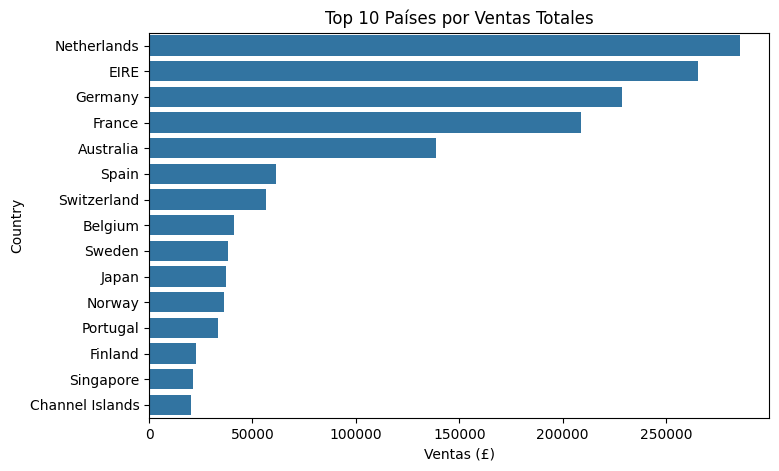

In [ ]:
df_no_uk = df[df['Country'] != 'United Kingdom']
country_sales = df_no_uk.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(15)
plt.figure(figsize=(8,5))
sns.barplot(x=country_sales.values, y=country_sales.index)
plt.title("Top 10 Países por Ventas Totales")
plt.xlabel("Ventas (£)")
plt.show()

A diferencia del gráfico de barras realizado en primera instancia, donde se evidenciaba una marcada tendencia de las compras realizadas por el Reino Unido, y parecía que las demás eran todas minimas o despreciables, en este segundo gráfico podemos ver una distribución más normal de las ventas.

Comprobada la utilidad de la división del dataset, continuaremos con estos mismos divididos, planteando diferencias y similitudes entre ambos grupos.

In [ ]:
df_uk = df[df['Country'] == 'United Kingdom']

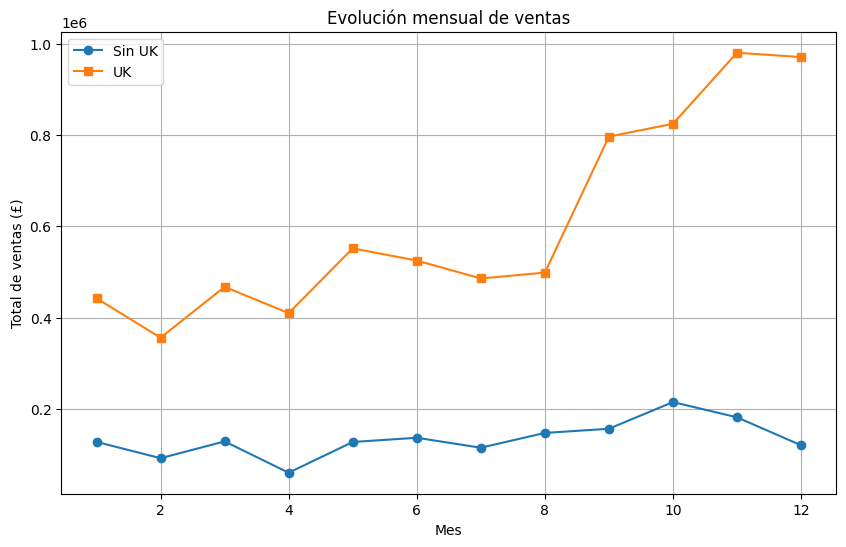

In [ ]:
plt.figure(figsize=(10, 6))

monthly_no_uk = df_no_uk.groupby('Month')['TotalPrice'].sum()
monthly_uk = df_uk.groupby('Month')['TotalPrice'].sum()

plt.plot(monthly_no_uk.index, monthly_no_uk.values, marker='o', label='Sin UK')
plt.plot(monthly_uk.index, monthly_uk.values, marker='s', label='UK')

plt.title("Evolución mensual de ventas")
plt.xlabel("Mes")
plt.ylabel("Total de ventas (£)")
plt.legend()
plt.grid(True)

plt.show()

Podemos observar que las ventas tanto en el exterior como en UK tienen un aumento especial en el ultimo trimestre del año, generalmente debido a las fiestas. Sin embargo, cabe destacar que este aumento es mucho mayor en UK que en el exterior, donde practicamente no hay cambios y se mantiene constante.

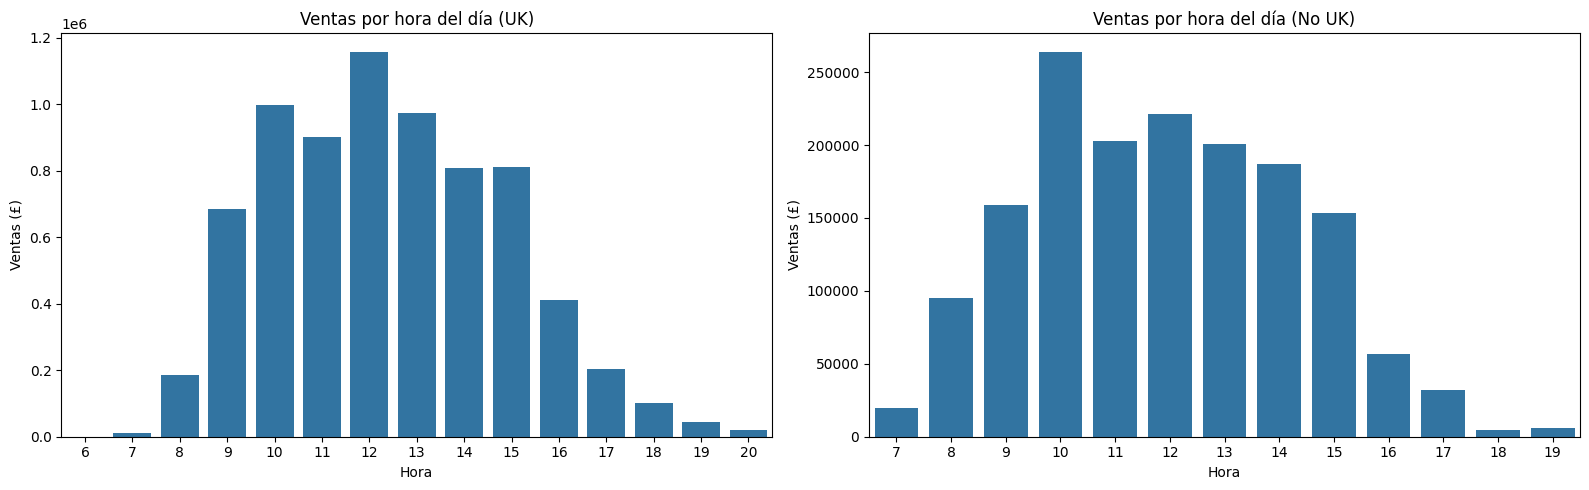

In [ ]:
# Horas con más ventas
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

hour_sales_uk = df_uk.groupby('Hour')['TotalPrice'].sum()
sns.barplot(x=hour_sales_uk.index, y=hour_sales_uk.values, ax=axes[0])
axes[0].set_title("Ventas por hora del día (UK)")
axes[0].set_xlabel("Hora")
axes[0].set_ylabel("Ventas (£)")

hour_sales_no_uk = df_no_uk.groupby('Hour')['TotalPrice'].sum()
sns.barplot(x=hour_sales_no_uk.index, y=hour_sales_no_uk.values, ax=axes[1])
axes[1].set_title("Ventas por hora del día (No UK)")
axes[1].set_xlabel("Hora")
axes[1].set_ylabel("Ventas (£)")

plt.tight_layout()
plt.show()

Respecto de las ventas según las horas del día, se observa una marcada prevalencia entre las 10 y las 15 horas. En este caso, observamos que en UK se observa una clara distribución normal, sin tendencia, siendo el pico de ventas a las 12. Esto puede deberse a la gran cantidad de ventas que incluye. En comparación, las ventas en el exterior tienen una tendencia a la izquierda, siendo el pico de ventas a las 10 de la mañana. Esto puede notarse por la cantidad menor de ventas, y deberse a la diferencia horaria que se encuentra.

In [ ]:
top_products = (
    pd.concat([df_uk, df_no_uk])
      .groupby('Description')['Quantity']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

top_list = top_products.index

prod_uk = (
    df_uk[df_uk['Description'].isin(top_list)]
    .groupby('Description')['Quantity']
    .sum()
    .reset_index()
)

prod_ext = (
    df_no_uk[df_no_uk['Description'].isin(top_list)]
    .groupby('Description')['Quantity']
    .sum()
    .reset_index()
)

prod_uk.rename(columns={'Quantity': 'UK'}, inplace=True)
prod_ext.rename(columns={'Quantity': 'Exterior'}, inplace=True)

# Unir por producto
pivot_df = pd.merge(prod_uk, prod_ext, on='Description', how='outer').fillna(0)

# Total y porcentajes
pivot_df['Total'] = pivot_df['UK'] + pivot_df['Exterior']
pivot_df['UK_pct'] = pivot_df['UK'] / pivot_df['Total']
pivot_df['Exterior_pct'] = pivot_df['Exterior'] / pivot_df['Total']

# Orden por total
pivot_df = pivot_df.sort_values('Total', ascending=False)
pivot_df.set_index('Description', inplace=True)


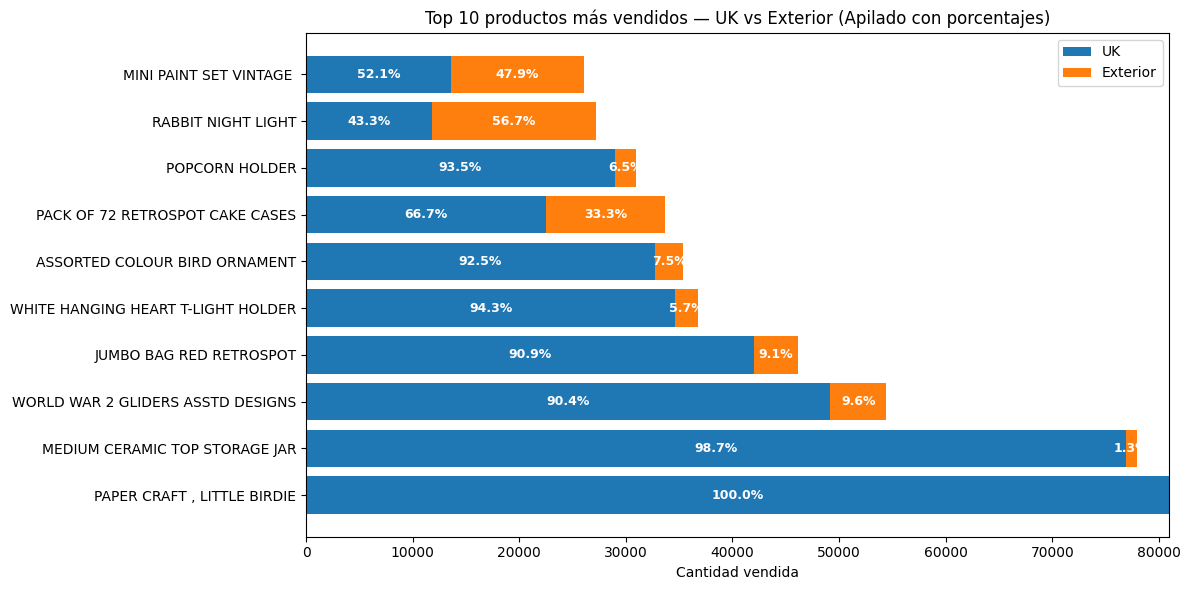

In [ ]:
plt.figure(figsize=(12, 6))

# UK
plt.barh(
    pivot_df.index,
    pivot_df['UK'],
    color="#1f77b4",
    label='UK'
)

# Exterior
plt.barh(
    pivot_df.index,
    pivot_df['Exterior'],
    left=pivot_df['UK'],
    color="#ff7f0e",
    label='Exterior'
)

# Porcentajes dentro de cada segmento
for i, product in enumerate(pivot_df.index):
    uk_val = pivot_df.loc[product, 'UK']
    ext_val = pivot_df.loc[product, 'Exterior']
    total = pivot_df.loc[product, 'Total']
    uk_pct = pivot_df.loc[product, 'UK_pct']
    ext_pct = pivot_df.loc[product, 'Exterior_pct']

    # UK %
    if uk_val > 0:
        plt.text(
            uk_val / 2,
            i,
            f"{uk_pct*100:.1f}%",
            ha='center', va='center',
            color='white', fontsize=9, weight='bold'
        )

    # Exterior %
    if ext_val > 0:
        plt.text(
            uk_val + ext_val / 2,
            i,
            f"{ext_pct*100:.1f}%",
            ha='center', va='center',
            color='white', fontsize=9, weight='bold'
        )

plt.title("Top 10 productos más vendidos — UK vs Exterior (Apilado con porcentajes)")
plt.xlabel("Cantidad vendida")
plt.legend()
plt.tight_layout()
plt.show()


Si observamos el gráfico de los productos más vendidos, se nota que las ventas principales son dentro de UK, siendo el aporte de las ventas del exterior en un porcentaje muy bajo entre lo más vendido. De los 10 productos más vendidos, solo en 3 casos el aporte del exterior es mayor al 10%. Esto puede deberse o a que los productos, o la propaganda, o el negocio en sí mismo se enfocan demasiado en el mercado en UK, o que no son tan atractivos para el exterior. Creo que este podría ser un buen punto para cambiar y explotar, aumentando las ventas.

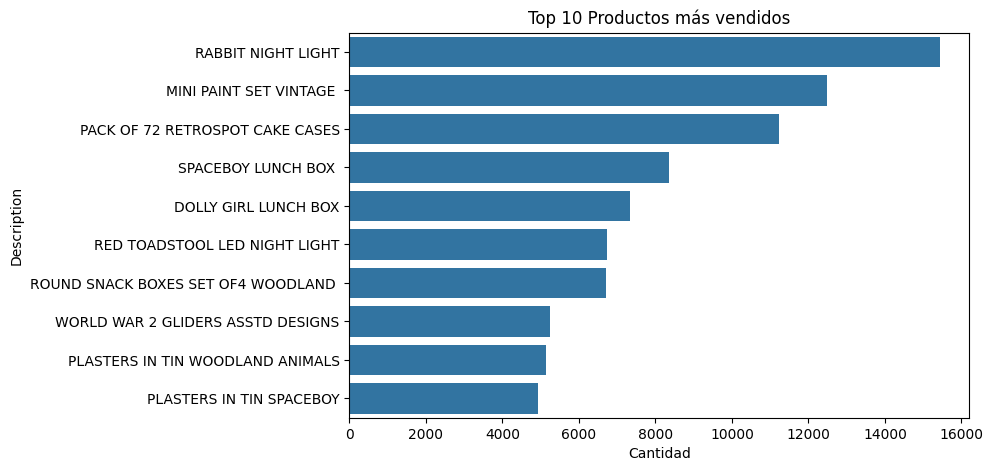

In [ ]:
# Productos más vendidos
top_products = df_no_uk.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Productos más vendidos")
plt.xlabel("Cantidad")
plt.show()


Se destaca que de los productos vendidos en el exterior, solamente los tres primeros y el septimo se encuentran en algun porcentaje entre los más vendidos. Se podria considerar cambiar los demas, o dejar solamente estos 10 y buscar algo más atractivo.

##**CONCLUSIÓN**

Se destaca del analisis que las ventas están focalizadas en el Reino Unido. Al separar el dataset para comparar con detenimiento, observamos que las costumbres de compra son muy parecidas, en cuanto a horarios y momento del año, entre el Reino Unido y las ventas realizadas al resto de los países.

De este mismo analisis se desprende que se podría pensar en cambiar los productos o hacer campañas, propagandas, con foco en ventas al exterior, donde se presume habría mucha posibilidad de crecimiento en cantidad de compras.

## ANALISIS RFM

En este analisis posterior, clasificaremos los clientes, según quienes compran más seguido, cuanto gastan, y si vale la pena o no hacer algo para mantener estos clientes, según el puntaje obtenido. Vale destacar, que como vimos al principio, ya que hay mucha diferencia en cantidad de compras en el Reino Unido y en el exterior, para seguir evitando el sesgo en las conclusiones, nuevamente separaremos entre ambos.

Para este analisis nuevo, definiremos tres variables:


*   Recencia: Cuánto pasó desde la última compra. Para eso, necesitamos plantear una fecha de referencia. Como sabemos que el dataset es entre 2010 y 2011, usaremos el 10 de diciembre como fecha límite. Cuánto más cerca de este valor, menos recencia.
*   Frecuencia: La cantidad de veces que compró en ese tiempo.
*   Gasto: Cuánto gastó el cliente en total





In [ ]:
# 1. Fecha de referencia
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

In [ ]:
# 2. Calcular R, F, y M
rfm_df = df.groupby('CustomerID').agg(
    # Recencia:
    Recencia=('InvoiceDate', lambda x: (snapshot_date - x.max()).days),
    # Frecuencia:
    Frecuencia=('InvoiceNo', 'nunique'),
    # Valor Monetario:
    Gasto=('TotalPrice', 'sum')
)

rfm_df.rename(columns={'Gasto': 'Gasto'}, inplace=True)
rfm_df.head()

,Recencia,Frecuencia,Gasto
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


Una vez creados los puntajes, clasificaremos a cada cliente en cada etapa. Para esto, le asignaremos un puntaje del 1 al 5, siendo 1 menos frecuente, menos gasto o más recencia, y 5 más frecuente, más gasto o menos recencia.

Finalmente, sumaremos los puntajes obtenidos en cada una, para cada cliente. Guardaremos esta suma, y el puntaje obtenido en cada item como un código de tres digitos.

In [ ]:
# 3. Asignar puntajes
rfm_df['R_Score'] = pd.qcut(rfm_df['Recencia'], 5, labels=False, duplicates='drop') + 1
max_r_score = rfm_df['R_Score'].max()
rfm_df['R_Score'] = rfm_df['R_Score'].apply(lambda x: max_r_score - x + 1)

rfm_df['F_Score'] = pd.qcut(rfm_df['Frecuencia'], 5, labels=False, duplicates='drop') + 1
rfm_df['M_Score'] = pd.qcut(rfm_df['Gasto'], 5, labels=False, duplicates='drop') + 1

# Crear el puntaje combinado RFM y el RFM_Score
rfm_df['RFM_Segment'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(int) + rfm_df['F_Score'].astype(int) + rfm_df['M_Score'].astype(int)

rfm_df.head()

,Recencia,Frecuencia,Gasto,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,5,115,7
12347.0,2,7,4310.00,5,4,5,545,14
12348.0,75,4,1797.24,2,3,4,234,9
12349.0,19,1,1757.55,4,1,4,414,9
12350.0,310,1,334.40,1,1,2,112,4


Luego, clasificaremos los clientes según el puntaje obtenido en "Campeones", "Clientes Fieles", "Nuevos Clientes", "Prometedores", "En Riesgo" y "Durmientes". Podríamos definir así cuales clientes son más factibles de recuperar, y orientar la actividad hacia ellos.

In [ ]:
# Función para asignar el nombre del segmento basado en las puntuaciones
def rfm_level(df):
    if df['RFM_Score'] >= 12 and df['R_Score'] >= 4:
        return '1. Campeones'
    elif df['RFM_Score'] >= 9 and df['F_Score'] >= 3:
        return '2. Clientes Fieles'
    elif df['R_Score'] == 5 and df['F_Score'] == 1:
        return '3. Nuevos Clientes'
    elif df['RFM_Score'] >= 6 and df['R_Score'] >= 3:
        return '4. Prometedores'
    elif df['R_Score'] <= 2 and df['F_Score'] >= 2:
        return '5. En Riesgo'
    else:
        return '6. Durmientes'

# Aplicar la función al DataFrame
rfm_df['RFM_Level'] = rfm_df.apply(rfm_level, axis=1)

# Mostrar la distribución de clientes por segmento
segment_counts = rfm_df['RFM_Level'].value_counts().sort_index()
print(segment_counts)

RFM_Level
1. Campeones           812
2. Clientes Fieles     622
3. Nuevos Clientes     187
4. Prometedores        992
5. En Riesgo           250
6. Durmientes         1475
Name: count, dtype: int64


Se observa que hay muchos clientes frecuentes, entre campeones y fieles. Igual cantidad tenemos de durmientes, que podemos considerar clientes esporádicos. También vale destacar los "Prometedores", clientes que se podrían fidelizar. Calcularemos luego el promedio de cada item.

In [ ]:
# Caracterización de los segmentos
rfm_level_agg = rfm_df.groupby('RFM_Level').agg(
    Num_Clientes=('Recencia', 'count'),
    Promedio_Recencia=('Recencia', 'mean'),
    Promedio_Frecuencia=('Frecuencia', 'mean'),
    Promedio_Monetario=('Gasto', 'mean')
).round(1)

# Calcular el porcentaje de clientes y porcentaje de ingresos
total_clientes = rfm_level_agg['Num_Clientes'].sum()
total_ingresos = rfm_level_agg['Promedio_Monetario'].sum() * rfm_level_agg['Num_Clientes']

rfm_level_agg['% Clientes'] = (rfm_level_agg['Num_Clientes'] / total_clientes * 100).round(1)
rfm_level_agg['% Ingresos'] = (total_ingresos / total_ingresos.sum() * 100).round(1)

print(rfm_level_agg.sort_values(by='Promedio_Monetario', ascending=False))

                    Num_Clientes  Promedio_Recencia  Promedio_Frecuencia  \
RFM_Level                                                                  
1. Campeones                 812               11.1                 12.3   
2. Clientes Fieles           622               52.4                  5.7   
3. Nuevos Clientes           187                7.0                  1.6   
5. En Riesgo                 250              149.4                  3.4   
4. Prometedores              992               35.8                  2.0   
6. Durmientes               1475              193.7                  1.3   

                    Promedio_Monetario  % Clientes  % Ingresos  
RFM_Level                                                       
1. Campeones                    6889.4        18.7        18.7  
2. Clientes Fieles              2078.5        14.3        14.3  
3. Nuevos Clientes              1425.8         4.3         4.3  
5. En Riesgo                    1277.9         5.8         5.8  
4

En este caso, observamos que el promedio monetario y el porcentaje de clientes en cada segmento está bien, sin embargo, el porcentaje de ingresos es incorrecto, coincide con el de clientes.

Para corregir este error, calcularemos el gasto total por segmento y volveremos a calcular el porcentaje con este valor.

In [ ]:
# 1. Calcular los valores TOTALES por segmento
rfm_level_agg = rfm_df.groupby('RFM_Level').agg(
    Num_Clientes=('Recencia', 'count'),
    Promedio_Monetario=('Gasto', 'mean'),
    Gasto_Total=('Gasto', 'sum')
).round(1)

print(rfm_level_agg)

                    Num_Clientes  Promedio_Monetario  Gasto_Total
RFM_Level                                                        
1. Campeones                 812              6889.4    5594221.3
2. Clientes Fieles           622              2078.5    1292824.0
3. Nuevos Clientes           187              1425.8     266627.5
4. Prometedores              992               741.4     735477.2
5. En Riesgo                 250              1277.9     319470.2
6. Durmientes               1475               476.5     702787.8


In [ ]:
# 2. Calcular los porcentajes
total_clientes = rfm_level_agg['Num_Clientes'].sum()
total_ingresos = rfm_level_agg['Gasto_Total'].sum() # ¡Usar la suma TOTAL!

rfm_level_agg['% Clientes'] = (rfm_level_agg['Num_Clientes'] / total_clientes * 100).round(1)
# ¡Este es el cálculo corregido!
rfm_level_agg['% Ingresos'] = (rfm_level_agg['Gasto_Total'] / total_ingresos * 100).round(1)

# Ordenar para la visualización (por Promedio Monetario)
rfm_level_agg = rfm_level_agg.sort_values(by='Promedio_Monetario', ascending=False)
print(rfm_level_agg)

                    Num_Clientes  Promedio_Monetario  Gasto_Total  % Clientes  \
RFM_Level                                                                       
1. Campeones                 812              6889.4    5594221.3        18.7   
2. Clientes Fieles           622              2078.5    1292824.0        14.3   
3. Nuevos Clientes           187              1425.8     266627.5         4.3   
5. En Riesgo                 250              1277.9     319470.2         5.8   
4. Prometedores              992               741.4     735477.2        22.9   
6. Durmientes               1475               476.5     702787.8        34.0   

                    % Ingresos  
RFM_Level                       
1. Campeones              62.8  
2. Clientes Fieles        14.5  
3. Nuevos Clientes         3.0  
5. En Riesgo               3.6  
4. Prometedores            8.3  
6. Durmientes              7.9  


Esta vez, obtuvimos el porcentaje de ingresos correcto, correspondiente a cada segmento. Se observa que el mayor porcentaje de ingresos proviene de "Campeones", y si sumaramos a los "Clientes Fieles", llegamos casi al 80% de los ingresos (77%). Además, el segmento siguiente en porcentaje de ingresos es el de "Prometedores", por lo que nuevamente podríamos apuntar a fidelizar estos clientes.

A continuación, y para concluir este análisis, traeremos nuevamente la información de cada país, separándolos entre Reino Unido y Exterior.

In [ ]:
# 1. Obtener el País asociado a cada CustomerID del DataFrame original (df)
rfm_country = df.groupby('CustomerID')['Country'].first().reset_index()

# 2. Unir el País al DataFrame RFM
rfm_df_final = rfm_df.merge(rfm_country, on='CustomerID')

rfm_df_final['Origen'] = rfm_df_final['Country'].apply(
    lambda x: 'United Kingdom' if x == 'United Kingdom' else 'Exterior'
)

rfm_df_final.head()

,CustomerID,Recencia,Frecuencia,Gasto,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,RFM_Level,Country,Origen
0,12346.0,326,1,77183.60,1,1,5,115,7,6. Durmientes,United Kingdom,United Kingdom
1,12347.0,2,7,4310.00,5,4,5,545,14,1. Campeones,Iceland,Exterior
2,12348.0,75,4,1797.24,2,3,4,234,9,2. Clientes Fieles,Finland,Exterior
3,12349.0,19,1,1757.55,4,1,4,414,9,4. Prometedores,Italy,Exterior
4,12350.0,310,1,334.40,1,1,2,112,4,6. Durmientes,Norway,Exterior


In [ ]:
# Comparar las métricas RFM promedio por Origen
metrics_by_origin = rfm_df_final.groupby('Origen').agg(
    Promedio_Recencia=('Recencia', 'mean'),
    Promedio_Frecuencia=('Frecuencia', 'mean'),
    Promedio_Monetario=('Gasto', 'mean'),
    Total_Clientes=('CustomerID', 'count')
).round(1)

print("Métricas RFM Promedio por Origen:")
print(metrics_by_origin)

Métricas RFM Promedio por Origen:
                Promedio_Recencia  Promedio_Frecuencia  Promedio_Monetario  \
Origen                                                                       
Exterior                     95.6                  4.5              3835.0   
United Kingdom               92.2                  4.2              1864.4   

                Total_Clientes  
Origen                          
Exterior                   418  
United Kingdom            3920  


Imprimiendo los valores promedios de cada item para comparar entre Exterior y Reino Unido, observamos que los valores de Recencia y Frecuencia son muy semejantes, pero hay mucha diferencia en el gasto promedio. Podemos decir que esto puede tener que ver con la cantidad de clientes que hay del exterior. Probablemente los clientes del exterior pertenezcan a las categorías de Campeones y Clientes Fieles, por lo que compran varias cosas a la vez. Veremos si esto es así más adelante.

In [ ]:
# Segmentos según su origen
cross_segment_vertical = pd.crosstab(
    rfm_df_final['RFM_Level'],
    rfm_df_final['Origen'],
    margins=True,
    normalize='columns'
).mul(100).round(1)

cross_segment_vertical.rename(columns={'All': 'Distribución General'}, inplace=True)

print("Distribución Vertical: % del TOTAL de cada Origen por Segmento RFM:")
print(cross_segment_vertical)

Distribución Vertical: % del TOTAL de cada Origen por Segmento RFM:
Origen              Exterior  United Kingdom  Distribución General
RFM_Level                                                         
1. Campeones            22.7            18.3                  18.7
2. Clientes Fieles      10.8            14.7                  14.3
3. Nuevos Clientes       4.5             4.3                   4.3
4. Prometedores         21.8            23.0                  22.9
5. En Riesgo             5.0             5.8                   5.8
6. Durmientes           35.2            33.9                  34.0


Como suponiamos, tenemos un porcentaje mayor de "Campeones" del exterior, que son los clientes más frecuentes y que podemos suponer que aprovechan para comprar varias cosas de una vez. Sin embargo, esto se encuentra equiparado con el porcentaje de diferencia en "Clientes Fieles", por lo que, con más razón, podemos decir que los alumnos del exterior compran más, gastan más. Finalmente, los demás porcentajes se encuentran parejos, con valores que difieren hasta 1.2%. En los primeros casos, la diferencia en cada caso era de hasta el 20% correspondiente de cada valor.